<a href="https://colab.research.google.com/github/Mckenz31/final_yr_proj/blob/main/final_year_proj_FA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
!nvidia-smi

Wed Jun 15 08:55:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |   8938MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [122]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [123]:
import matplotlib.pyplot as plt
import datetime

INPUT_SHAPE = (224, 224, 3)
IMAGE_SIZE = (224, 224)

In [124]:
# Using Tensorflow Datasets to Download Data
import tensorflow_datasets as tfds

In [5]:
# List available datasets

datasets = tfds.list_builders()
datasets

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
print("stanford_online_products" in datasets)

True


In [ ]:
(train_data, test_data), ds_info = tfds.load(
    name = "stanford_online_products",
    split = ["test", "train"],
    shuffle_files = True,
    as_supervised = False,
    with_info = True
)

In [ ]:
ds_info.features

FeaturesDict({
    'class_id': ClassLabel(shape=(), dtype=tf.int64, num_classes=22634),
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'super_class_id': ClassLabel(shape=(), dtype=tf.int64, num_classes=12),
    'super_class_id/num': ClassLabel(shape=(), dtype=tf.int64, num_classes=12),
})

In [ ]:
class_names = ds_info.features["super_class_id"].names
class_names

['bicycle',
 'cabinet',
 'chair',
 'coffee_maker',
 'fan',
 'kettle',
 'lamp',
 'mug',
 'sofa',
 'stapler',
 'table',
 'toaster']

In [ ]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset element_spec={'class_id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'super_class_id': TensorSpec(shape=(), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
for element_spec in train_one_sample:
  print(f"Image shape: {element_spec['image'].shape}")
  print(f"Image shape: {element_spec['image'].dtype}")
  print(f"Target class: {element_spec['super_class_id']}" )
  print(f"Target class name:  {class_names[element_spec['super_class_id']]}")

Image shape: (400, 400, 3)
Image shape: <dtype: 'uint8'>
Target class: 10
Target class name:  table


In [ ]:
element_spec['image']

<tf.Tensor: shape=(400, 400, 3), dtype=uint8, numpy=
array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 25

In [ ]:
image = element_spec["image"]

In [ ]:
label = class_names[element_spec['super_class_id']]
label

'table'

In [ ]:
#Min and mac values
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 399.5, 399.5, -0.5)

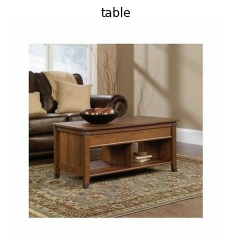

In [ ]:
# Plot the image

plt.imshow(image)
plt.title(class_names[element_spec['super_class_id']])
plt.axis(False)

# Processing our data

Our dataset [Todo]

- It is in unit8 -> needs to be converted to float32
- Different sized images -> need to make them uniform
- Not scaled (0-255) -> Scaled (0-1)

In [ ]:
print(f"Image before preprocessing:\n {element_spec['image'][:3]}...,\nShape: {element_spec['image'].shape},\nDatatype: {element_spec['image'].dtype}\n")

Image before preprocessing:
 [[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]...,
Shape: (400, 400, 3),
Datatype: <dtype: 'uint8'>



In [ ]:
def preprocess_img(element_spec):

  element_spec['image'] = tf.image.resize(element_spec['image'], [224, 224])
  tf.cast(element_spec['image'], tf.float32), 
  return element_spec

In [ ]:
preprocessed_img = preprocess_img(element_spec)
print(f"Image after preprocessing:\n {preprocessed_img['image'][:3]}...,\nShape: {preprocessed_img['image'].shape},\nDatatype: {preprocessed_img['image'].dtype}")

Image after preprocessing:
 [[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


(-0.5, 223.5, 223.5, -0.5)

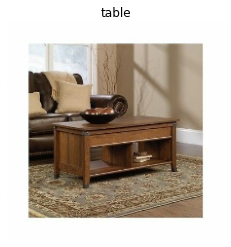

In [ ]:
plt.imshow(preprocessed_img['image']/255)
plt.title(label)
plt.axis(False)

Original dataset (e.g. train_data) -> map() -> shuffle() -> batch() -> prefetch() -> PrefetchDataset

In [ ]:
# Map preprocessing function
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)

train_data = train_data.shuffle(buffer_size=1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

'''
num_parallel_calls = tf.data.AUTOTUNE -> this is done for prefetching
Prefetching is done such that - while the GPU works on the data, the CPU does
not remain idle but rather prepares the next set of data.
This way, the entire process of preparing and using data happens concurrently,
thus saving lots of time
'''

test_data = test_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)

test_data = test_data.batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec={'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>,
 <PrefetchDataset element_spec={'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>)

In [ ]:
# Mixed precision

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

# Create modelling callbacks - confusion matrix

In [125]:
# Tensorboard callback
def tensorboard_callback(dir_name, exp_name):

  log_dir = dir_name + '/' + exp_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callbac = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )

  return tensorboard_callbac

# ModelCheckpoint callback

checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved 

In [126]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

def confusion_matrix_disp(y_true, y_pred, classes=None, figsize=(12, 12), text_size=15, norm=False, save_fig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arrange(cm.shape[0])

  ax.set(
      title="Confusion Matrix",
      xlabel = "Prediction",
      ylabel = "Actual",
      xticks = np.arange(n_classes),
      yticks = np.arrange(n_classes),
      xticklabel = labels,
      yticklabel =labels
  )

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
      
  if save_fig:
    fig.savefig("confusion_matrix.png")


In [127]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [128]:
def load_and_prep(filename, input_shape=224, scale=True):
  img = tf.io.read_file(filename),
  img = tf.image.decode_jpeg(img),
  img = tf.image.resize(img, [input_shape, input_shape])

  if scale:
    return img/225.
  else:
    return img

In [129]:
def plot_curves(model, filename, class_names):
  img = load_and_prep(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if(len(pred[0])) > 1:
     pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

# EFFICIENTNET B0

## Feature extraction

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Functional layers
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
x = tf.keras.layers.Dense(len(class_names))(x)

outputs = tf.keras.layers.Activation("softmax", dtype = tf.float32, name="softmax_output_float32")(x)

model = tf.keras.Model(inputs, outputs)


In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense_1 (Dense)             (None, 12)                15372     
                                                                 
 softmax_output_float32 (Act  (None, 12)               0         
 ivation)                                                        
                                                                 
Total params: 4,064,943
Trainable params: 15,372
Non-traina

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_output_float32 True float32 <Policy "float32">


In [ ]:
len(train_data)

1891

In [ ]:
train_data

<PrefetchDataset element_spec={'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [ ]:
train_data.element_spec

{'class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 'super_class_id': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'super_class_id/num': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}

In [ ]:
dictValue = train_data.element_spec
ls = []
ls.append(dictValue["class_id"])
ls.append(dictValue["image"])
ts = tuple(ls)
ts

(TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None))

In [ ]:
len(ts)

2

In [ ]:
# Fit the model with callbacks
history_B0 = model.fit(
    train_data, 
    epochs=3,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(len(test_data)),
)

Epoch 1/3


ValueError: ignored

# Custom Model

In [71]:
train_dir = "/content/drive/MyDrive/Final yr proj/dataset_C1/train"
test_dir = "/content/drive/MyDrive/Final yr proj/dataset_C1/test"

In [17]:
train_dir = "/content/drive/MyDrive/Final yr proj/C2_V1_customImages/images/train"
test_dir = "/content/drive/MyDrive/Final yr proj/C2_V1_customImages/images/test"

In [46]:
train_dir = "/content/drive/MyDrive/Final yr proj/Dataset_refined/train"
test_dir = "/content/drive/MyDrive/Final yr proj/Dataset_refined/test"

In [72]:
# Resize image, shuffle

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, 
    label_mode = "categorical",
    image_size = (224, 224),
    shuffle = True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, 
    label_mode = "categorical",
    image_size = (224, 224),
    shuffle = False
)

Found 250 files belonging to 5 classes.
Found 50 files belonging to 5 classes.


In [73]:
# Data Augmentation

data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
], name="C1_data_augmentation_layer")

### EFFICIENTNETB0

In [75]:
## Model

C10_base_model = tf.keras.applications.EfficientNetB0(include_top=False)
C10_base_model.trainable = False

C10_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="C10_input_layer")

C10_x = data_augmentation(C10_input_layer)
C10_x = C10_base_model(C10_x, training=False)
C10_x = tf.keras.layers.GlobalAveragePooling2D(name="C10_pooling_layer")(C10_x)

C10_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C10_output_dense_layer")(C10_x)

C10_model = tf.keras.Model(C10_input_layer, C10_output_layer)

In [76]:
C10_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [77]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [78]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [79]:
C1_history = C10_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1",
        ),
        model_checkpoint
    ]
)

Epoch 1/5
8/8 [==============================] - 20s 657ms/step - loss: 1.3492 - accuracy: 0.4720 - val_loss: 1.0642 - val_accuracy: 0.7000
Epoch 2/5
8/8 [==============================] - 8s 343ms/step - loss: 0.9193 - accuracy: 0.7040 - val_loss: 0.7486 - val_accuracy: 0.8200
Epoch 3/5
8/8 [==============================] - 9s 519ms/step - loss: 0.6663 - accuracy: 0.8480 - val_loss: 0.5784 - val_accuracy: 0.8800
Epoch 4/5
8/8 [==============================] - 8s 419ms/step - loss: 0.5012 - accuracy: 0.8960 - val_loss: 0.4839 - val_accuracy: 0.8600
Epoch 5/5
8/8 [==============================] - 8s 377ms/step - loss: 0.4193 - accuracy: 0.9160 - val_loss: 0.4206 - val_accuracy: 0.9200


In [80]:
C10_model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C10_input_layer (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 C1_data_augmentation_layer   (None, 224, 224, 3)      0         
 (Sequential)                                                    
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 C10_pooling_layer (GlobalAv  (None, 1280)             0         
 eragePooling2D)                                                 
                                                                 
 C10_output_dense_layer (Den  (None, 5)                6405      
 se)                                                      

In [138]:
len(C13_base_model.layers)

NameError: ignored

In [97]:
C1_results = C10_model.evaluate(test_data)
C1_results

2/2 [==============================] - 1s 421ms/step - loss: 0.4206 - accuracy: 0.9200


[0.42058929800987244, 0.9200000166893005]

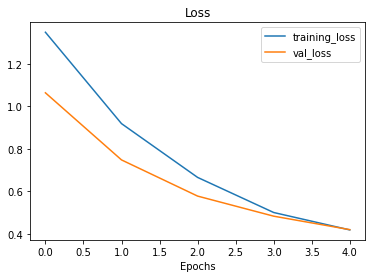

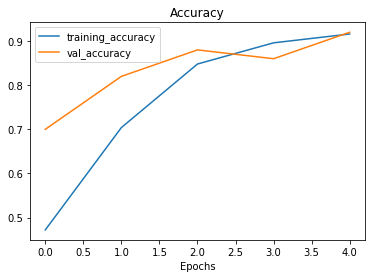

In [82]:
plot_loss_curves(C1_history)

### EFFICIENTNETB1

In [83]:
## Model

C11_base_model = tf.keras.applications.EfficientNetB1(include_top=False)
C11_base_model.trainable = False

C11_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="C11_input_layer")

C11_x = data_augmentation(C11_input_layer)
C11_x = C11_base_model(C11_x, training=False)
C11_x = tf.keras.layers.GlobalAveragePooling2D(name="C11_pooling_layer")(C11_x)

C11_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C11_output_dense_layer")(C11_x)

C11_model = tf.keras.Model(C11_input_layer, C11_output_layer)

In [84]:
C11_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
C14_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
C15_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
C16_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
C17_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [85]:
C11_history = C11_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_EffB1",
        ),
        model_checkpoint
    ]
)

Epoch 1/5
8/8 [==============================] - 21s 953ms/step - loss: 1.3685 - accuracy: 0.4600 - val_loss: 1.1343 - val_accuracy: 0.6600
Epoch 2/5
8/8 [==============================] - 9s 572ms/step - loss: 0.9416 - accuracy: 0.7720 - val_loss: 0.7960 - val_accuracy: 0.8000
Epoch 3/5
8/8 [==============================] - 9s 517ms/step - loss: 0.6373 - accuracy: 0.8800 - val_loss: 0.5830 - val_accuracy: 0.8600
Epoch 4/5
8/8 [==============================] - 9s 474ms/step - loss: 0.4732 - accuracy: 0.9520 - val_loss: 0.4484 - val_accuracy: 0.9200
Epoch 5/5
8/8 [==============================] - 8s 383ms/step - loss: 0.3979 - accuracy: 0.9360 - val_loss: 0.3673 - val_accuracy: 0.9200


In [ ]:
C14_history = C14_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_EffB4",
        ),
        model_checkpoint
    ]
)

In [ ]:
C15_history = C15_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_EffB5",
        ),
        model_checkpoint
    ]
)

In [ ]:
C16_history = C16_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_EffB6",
        ),
        model_checkpoint
    ]
)

In [ ]:
C17_history = C17_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_EffB7",
        ),
        model_checkpoint
    ]
)

In [98]:
C11_results = C11_model.evaluate(test_data)
C11_results

2/2 [==============================] - 1s 440ms/step - loss: 0.3673 - accuracy: 0.9200


[0.36728087067604065, 0.9200000166893005]

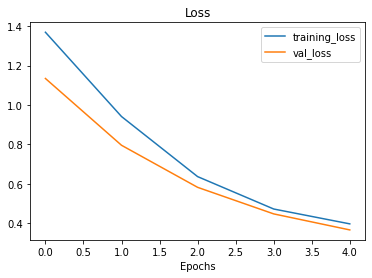

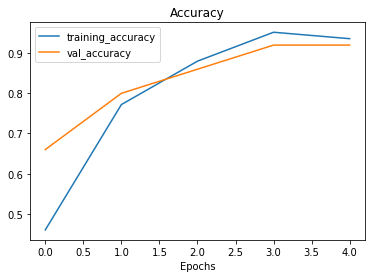

In [88]:
plot_loss_curves(C11_history)

In [89]:
## Model

C12_base_model = tf.keras.applications.EfficientNetB2(include_top=False)
C12_base_model.trainable = False

C12_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="C12_input_layer")

C12_x = data_augmentation(C12_input_layer)
C12_x = C12_base_model(C12_x, training=False)
C12_x = tf.keras.layers.GlobalAveragePooling2D(name="C12_pooling_layer")(C12_x)

C12_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C12_output_dense_layer")(C12_x)

C12_model = tf.keras.Model(C12_input_layer, C12_output_layer)

In [90]:
C12_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [91]:
C12_history = C12_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_EffB2",
        ),
        model_checkpoint
    ]
)

Epoch 1/5
8/8 [==============================] - 24s 1s/step - loss: 1.4707 - accuracy: 0.3840 - val_loss: 1.2245 - val_accuracy: 0.6600
Epoch 2/5
8/8 [==============================] - 13s 711ms/step - loss: 0.9768 - accuracy: 0.7880 - val_loss: 0.8593 - val_accuracy: 0.8200
Epoch 3/5
8/8 [==============================] - 13s 699ms/step - loss: 0.6955 - accuracy: 0.8920 - val_loss: 0.6319 - val_accuracy: 0.8800
Epoch 4/5
8/8 [==============================] - 12s 583ms/step - loss: 0.5371 - accuracy: 0.9080 - val_loss: 0.4988 - val_accuracy: 0.9400
Epoch 5/5
8/8 [==============================] - 9s 507ms/step - loss: 0.4164 - accuracy: 0.9240 - val_loss: 0.4156 - val_accuracy: 0.9600


In [95]:
C12_results = C12_model.evaluate(test_data)
C12_results

2/2 [==============================] - 1s 624ms/step - loss: 0.4156 - accuracy: 0.9600


[0.41555121541023254, 0.9599999785423279]

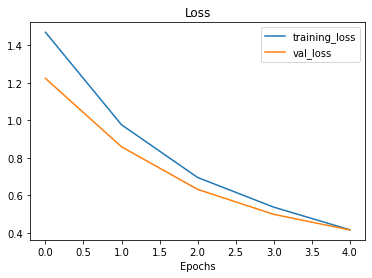

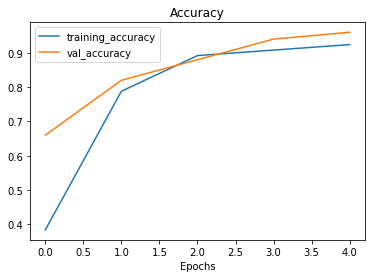

In [99]:
plot_loss_curves(C12_history)

In [100]:
## Model

C17_base_model = tf.keras.applications.EfficientNetB3(include_top=False)
C17_base_model.trainable = False

C17_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="C17_input_layer")

C17_x = data_augmentation(C17_input_layer)
C17_x = C17_base_model(C17_x, training=False)
C17_x = tf.keras.layers.GlobalAveragePooling2D(name="C1_pooling_layer")(C17_x)

C17_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C1_output_dense_layer")(C17_x)

C17_model = tf.keras.Model(C17_input_layer, C17_output_layer)

In [101]:
C17_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [102]:
C17_history = C17_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_EffB7",
        ),
        model_checkpoint
    ]
)

Epoch 1/5
8/8 [==============================] - 24s 1s/step - loss: 1.4405 - accuracy: 0.4000 - val_loss: 1.1375 - val_accuracy: 0.7400
Epoch 2/5
8/8 [==============================] - 11s 798ms/step - loss: 0.8861 - accuracy: 0.7920 - val_loss: 0.7699 - val_accuracy: 0.8600
Epoch 3/5
8/8 [==============================] - 14s 726ms/step - loss: 0.5908 - accuracy: 0.8880 - val_loss: 0.5680 - val_accuracy: 0.9200
Epoch 4/5
8/8 [==============================] - 12s 825ms/step - loss: 0.4511 - accuracy: 0.9120 - val_loss: 0.4555 - val_accuracy: 0.9000
Epoch 5/5
8/8 [==============================] - 11s 829ms/step - loss: 0.3296 - accuracy: 0.9440 - val_loss: 0.3849 - val_accuracy: 0.9200


In [103]:
C17_results = C17_model.evaluate(test_data)
C17_results

2/2 [==============================] - 1s 443ms/step - loss: 0.3849 - accuracy: 0.9200


[0.38490578532218933, 0.9200000166893005]

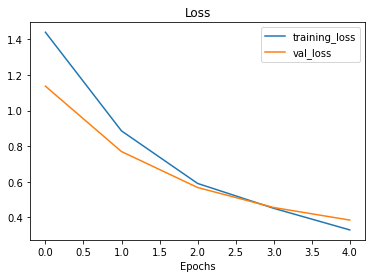

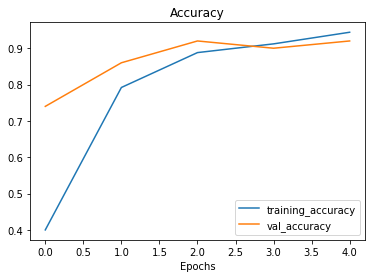

In [104]:
plot_loss_curves(C17_history)

### RESNET

In [106]:
## Model

R50_base_model = tf.keras.applications.ResNet50(include_top=False)
R50_base_model.trainable = False

R50_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="R50_input_layer")

R50_x = data_augmentation(R50_input_layer)
R50_x = R50_base_model(R50_x, training=False)
R50_x = tf.keras.layers.GlobalAveragePooling2D(name="C1_pooling_layer")(R50_x)

R50_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C1_output_dense_layer")(R50_x)

R50_model = tf.keras.Model(R50_input_layer, R50_output_layer)

In [107]:
R50_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [109]:
R50_history = R50_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_Resnet50",
        ),
        model_checkpoint
    ]
)

Epoch 1/5
8/8 [==============================] - 19s 1s/step - loss: 1.4682 - accuracy: 0.4040 - val_loss: 1.0107 - val_accuracy: 0.6800
Epoch 2/5
8/8 [==============================] - 12s 963ms/step - loss: 0.8455 - accuracy: 0.6880 - val_loss: 0.6058 - val_accuracy: 0.7000
Epoch 3/5
8/8 [==============================] - 14s 994ms/step - loss: 0.5363 - accuracy: 0.8160 - val_loss: 0.4199 - val_accuracy: 0.8800
Epoch 4/5
8/8 [==============================] - 11s 690ms/step - loss: 0.4087 - accuracy: 0.8600 - val_loss: 0.4141 - val_accuracy: 0.8800
Epoch 5/5
8/8 [==============================] - 11s 756ms/step - loss: 0.3456 - accuracy: 0.8920 - val_loss: 0.3687 - val_accuracy: 0.9000


In [110]:
R50_results = R50_model.evaluate(test_data)
R50_results

2/2 [==============================] - 1s 660ms/step - loss: 0.3687 - accuracy: 0.9000


[0.3686791658401489, 0.8999999761581421]

In [111]:
R50_model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 R50_input_layer (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 C1_data_augmentation_layer   (None, 224, 224, 3)      0         
 (Sequential)                                                    
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 C1_pooling_layer (GlobalAve  (None, 2048)             0         
 ragePooling2D)                                                  
                                                                 
 C1_output_dense_layer (Dens  (None, 5)                10245     
 e)                                                       

In [139]:
len(R50_base_model.layers)

175

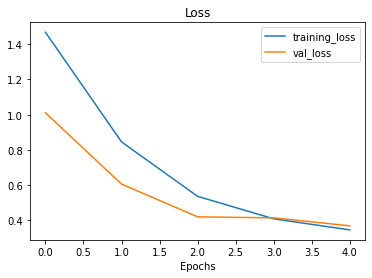

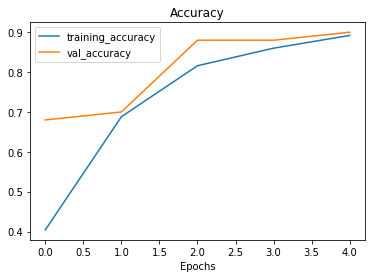

In [113]:
plot_loss_curves(R50_history)

### VGG19

In [115]:
## Model

VGG19_base_model = tf.keras.applications.VGG19(include_top=False)
VGG19_base_model.trainable = False

VGG19_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="VGG19_input_layer")

VGG19_x = data_augmentation(VGG19_input_layer)
VGG19_x = VGG19_base_model(VGG19_x, training=False)
VGG19_x = tf.keras.layers.GlobalAveragePooling2D(name="VGG19_pooling_layer")(VGG19_x)

VGG19_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="VGG19_output_dense_layer")(VGG19_x)

VGG19_model = tf.keras.Model(VGG19_input_layer, VGG19_output_layer)

In [116]:
VGG19_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [117]:
VGG19_history = VGG19_model.fit(
    train_data,
    epochs = 5, 
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        tensorboard_callback(
            dir_name="final_year_proj",
            exp_name="C1_T1_VGG19",
        ),
        model_checkpoint
    ]
)

Epoch 1/5
8/8 [==============================] - 39s 4s/step - loss: 6.2968 - accuracy: 0.2320 - val_loss: 7.5232 - val_accuracy: 0.2000
Epoch 2/5
8/8 [==============================] - 32s 3s/step - loss: 4.5445 - accuracy: 0.2720 - val_loss: 5.4509 - val_accuracy: 0.2200
Epoch 3/5
8/8 [==============================] - 33s 3s/step - loss: 3.1154 - accuracy: 0.4200 - val_loss: 4.0320 - val_accuracy: 0.3600
Epoch 4/5
8/8 [==============================] - 31s 3s/step - loss: 2.0659 - accuracy: 0.5120 - val_loss: 3.0420 - val_accuracy: 0.5200
Epoch 5/5
8/8 [==============================] - 28s 3s/step - loss: 1.8744 - accuracy: 0.5840 - val_loss: 2.4611 - val_accuracy: 0.5800


In [118]:
VGG_19_results = VGG19_model.evaluate(test_data)
VGG_19_results

2/2 [==============================] - 1s 438ms/step - loss: 2.4611 - accuracy: 0.5800


[2.461055040359497, 0.5799999833106995]

In [119]:
VGG19_model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 VGG19_input_layer (InputLay  [(None, 224, 224, 3)]    0         
 er)                                                             
                                                                 
 C1_data_augmentation_layer   (None, 224, 224, 3)      0         
 (Sequential)                                                    
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 VGG19_pooling_layer (Global  (None, 512)              0         
 AveragePooling2D)                                               
                                                                 
 VGG19_output_dense_layer (D  (None, 5)                2565      
 ense)                                                    

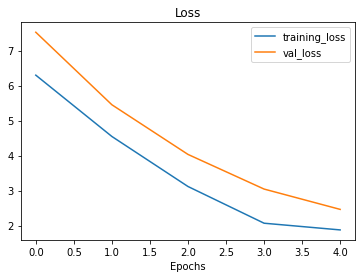

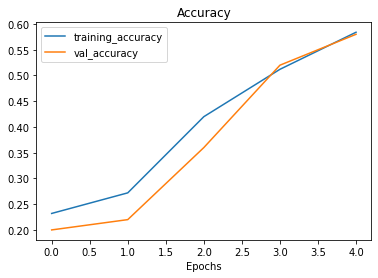

In [120]:
plot_loss_curves(VGG19_history)

In [32]:
## Model

C1_base_model = tf.keras.applications.EfficientNetB6(include_top=False)
C1_base_model.trainable = False

C1_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="C1_input_layer")

C1_x = data_augmentation(C1_input_layer)
C1_x = C1_base_model(C1_x, training=False)
C1_x = tf.keras.layers.GlobalAveragePooling2D(name="C1_pooling_layer")(C1_x)

C1_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C1_output_dense_layer")(C1_x)

C1_model = tf.keras.Model(C1_input_layer, C1_output_layer)

165249024/165234480 [==============================] - 1s 0us/step


In [33]:
## Model

C1_base_model = tf.keras.applications.EfficientNetB7(include_top=False)
C1_base_model.trainable = False

C1_input_layer = tf.keras.layers.Input(shape=(224, 224, 3), name="C1_input_layer")

C1_x = data_augmentation(C1_input_layer)
C1_x = C1_base_model(C1_x, training=False)
C1_x = tf.keras.layers.GlobalAveragePooling2D(name="C1_pooling_layer")(C1_x)

C1_output_layer = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="C1_output_dense_layer")(C1_x)

C1_model = tf.keras.Model(C1_input_layer, C1_output_layer)

258088960/258076736 [==============================] - 1s 0us/step
